In [1]:
import pandas as pd
import numpy as np
%matplotlib inline



In [2]:
df = pd.read_csv('C:/Users/Tuan_Ngo/Downloads/GP-Practices.csv')
df.head()

,NHS Board Name,Month_Year,Practice Code,Practice List Size,Practice Name,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Postcode,Telephone Number,CHP Name,CHP Code,Practice Type,Dispensing Practice,Public
0,LOTHIAN,1_2014,70022,3307,BANGHOLM MEDICAL CENTRE (WHITE PRACTICE),Bangholm Medical Centre (White Practice),Bangholm Loan,Edinburgh,NaN,EH5 3AH,0131 552 6363,Edinburgh Community Health Partnership,S03000042,17J (Old GMS),N,Y
1,LOTHIAN,1_2014,70037,3434,"DRS AYLES, RIGG & MCCULLOCH","Drs Ayles, Rigg & Mcculloch",Hermitage Medical Practices,5-6 Hermitage Terrace,Edinburgh,EH10 4RP,0131 447 6277,Edinburgh Community Health Partnership,S03000042,17J (Old GMS),N,Y
2,LOTHIAN,1_2014,70075,9125,BRAIDS MEDICAL PRACTICE,Braids Medical Practice,6 Camus Avenue,Edinburgh,NaN,EH10-6QT,0131 445 5999,Edinburgh Community Health Partnership,S03000042,17J (Old GMS),N,Y
3,LOTHIAN,1_2014,70094,8142,THE GREEN PRACTICE,The Green Practice,Stockbridge Health Centre,1 India Place,Edinburgh,EH3-6EH,0131 260 9227,Edinburgh Community Health Partnership,S03000042,17C (Old PMS),N,NaN
4,LOTHIAN,1_2014,70107,6537,LEVEN MEDICAL PRACTICE,Leven Medical Practice,Tollcross Health Centre,Ponton Street,Edinburgh,EH3 9QQ,0131 536 9700,Edinburgh Community Health Partnership,S03000042,17J (Old GMS),N,NaN


In [3]:
def split_word(x):
    a= x.split()
    return a[0]
df['Practice Type'] = df['Practice Type'].apply(split_word)


In [4]:
def format_postcode(x):
    x = str(x)
    x = x.replace('-',' ')
    y= x[:-3] + '-'+ x[-3:]
    return y.replace(' ','')

df['Postcode']= df['Postcode'].apply(format_postcode)


In [5]:
df.Public = df.Public.replace(['Yes',"No"],['Y','N'])
df.Public = df.Public.fillna('N')


In [6]:
df.rename(columns={'Practice Code': 'PCode', 'Practice List Size': 'PSize'}, inplace = True)

In [7]:
def replace_negative(x):
    a=df.PSize.mean()
    a = int(round(a))
    if x < 0: return a
    else: return x
df.PSize = df.PSize.apply(replace_negative)
    

In [8]:
df['Practice Name'] = df['Practice Name'].apply(lambda t: t.title())

In [9]:
df['Month'] = df['Month_Year'].apply(lambda t: int(t[0]))
df['Year']= df['Month_Year'].apply(lambda t: int(t[-4:]))


In [10]:
df.head()

,NHS Board Name,Month_Year,PCode,PSize,Practice Name,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Postcode,Telephone Number,CHP Name,CHP Code,Practice Type,Dispensing Practice,Public,Month,Year
0,LOTHIAN,1_2014,70022,3307,Bangholm Medical Centre (White Practice),Bangholm Medical Centre (White Practice),Bangholm Loan,Edinburgh,NaN,EH5-3AH,0131 552 6363,Edinburgh Community Health Partnership,S03000042,17J,N,Y,1,2014
1,LOTHIAN,1_2014,70037,3434,"Drs Ayles, Rigg & Mcculloch","Drs Ayles, Rigg & Mcculloch",Hermitage Medical Practices,5-6 Hermitage Terrace,Edinburgh,EH10-4RP,0131 447 6277,Edinburgh Community Health Partnership,S03000042,17J,N,Y,1,2014
2,LOTHIAN,1_2014,70075,9125,Braids Medical Practice,Braids Medical Practice,6 Camus Avenue,Edinburgh,NaN,EH10-6QT,0131 445 5999,Edinburgh Community Health Partnership,S03000042,17J,N,Y,1,2014
3,LOTHIAN,1_2014,70094,8142,The Green Practice,The Green Practice,Stockbridge Health Centre,1 India Place,Edinburgh,EH3-6EH,0131 260 9227,Edinburgh Community Health Partnership,S03000042,17C,N,N,1,2014
4,LOTHIAN,1_2014,70107,6537,Leven Medical Practice,Leven Medical Practice,Tollcross Health Centre,Ponton Street,Edinburgh,EH3-9QQ,0131 536 9700,Edinburgh Community Health Partnership,S03000042,17J,N,N,1,2014


In [11]:
df.loc[[3,4,8,20,21,22,23,24,25,26,27,28,29,30],['Practice Name', 'Telephone Number','CHP Name','CHP Code']]



,Practice Name,Telephone Number,CHP Name,CHP Code
3,The Green Practice,0131 260 9227,Edinburgh Community Health Partnership,S03000042
4,Leven Medical Practice,0131 536 9700,Edinburgh Community Health Partnership,S03000042
8,Ferniehill Surgery,0131 664 2166,Edinburgh Community Health Partnership,S03000042
20,Inverleith Medical Practice,0131 552 3369,Edinburgh Community Health Partnership,S03000042
21,Ladywell Medical Centre (East),0131 334 5000,Edinburgh Community Health Partnership,S03000042
22,Liberton Medical Group,0131 664 3050,Edinburgh Community Health Partnership,S03000042
23,Mackenzie Medical Centre,0131 667 2955,Edinburgh Community Health Partnership,S03000042
24,Dr Wilson & Partners,0131 225 9191,Edinburgh Community Health Partnership,S03000042
25,Grange Medical Group,0131 447 1646,Edinburgh Community Health Partnership,S03000042
26,Milton Surgery,0131 549 7300,Edinburgh Community Health Partnership,S03000042


S03000042    74
S03000035    24
S03000031    16
S03000032    12
Name: CHP Code, dtype: int64


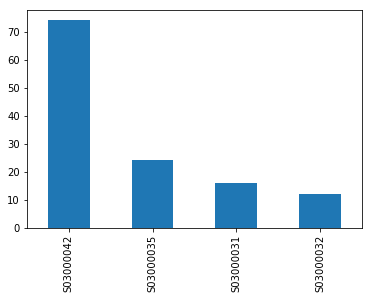

In [12]:
CHP_code = df['CHP Code'].value_counts()
print (CHP_code)
CHP_code.plot.bar()

In [13]:
df[df.PSize > 10000].PCode

7      70131
12     70220
14     70253
21     70361
37     70592
43     70662
49     70785
56     70930
64     71082
87     76226
93     77106
94     77111
97     77197
102    78024
112    78166
113    78171
115    78190
116    78241
117    78255
118    78260
121    78325
Name: PCode, dtype: int64

In [14]:
df.groupby('CHP Name')['PSize'].mean()

CHP Name
East Lothian Community Health Partnership    6534.500000
Edinburgh Community Health Partnership       7037.810811
Midlothian Community Health Partnership      7442.416667
West Lothian Community Health Partnership    7787.125000
Name: PSize, dtype: float64

In [15]:
df.sort_values(['PSize','PCode'],ascending = [False,True])

,NHS Board Name,Month_Year,PCode,PSize,Practice Name,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Postcode,Telephone Number,CHP Name,CHP Code,Practice Type,Dispensing Practice,Public,Month,Year
37,LOTHIAN,5_2014,70592,22927,University Health Service,University Health Service,6 Bristo Square,Edinburgh,NaN,EH8-9AL,0131 650 2777,Edinburgh Community Health Partnership,S03000042,17J,N,N,5,2014
93,LOTHIAN,7_2014,77106,14493,Newbattle Medical Practice,Newbattle Medical Practice,Blackcot,Mayfield,Midlothian,EH22-4AA,0131 663 1051,Midlothian Community Health Partnership,S03000032,17J,N,Y,7,2014
112,LOTHIAN,6_2015,78166,14133,Linlithgow Group Medical Practice,Linlithgow Group Medical Practice,Linlithgow Health Centre,288 High Street,Linlithgow,EH49-7ER,01506 670027,West Lothian Community Health Partnership,S03000035,17J,N,N,6,2015
87,LOTHIAN,7_2014,76226,13908,Tranent Medical Practice,Tranent Medical Practice,The Health Centre,Loch Road,Tranent,EH33-2JX,01875 610697,East Lothian Community Health Partnership,S03000031,17J,N,Y,7,2014
116,LOTHIAN,6_2015,78241,13243,Armadale Group Practice,Armadale Group Practice,18 North Street,Armadale,West Lothian,EH48-3QB,01501 730432,West Lothian Community Health Partnership,S03000035,17J,N,N,6,2015
56,LOTHIAN,5_2014,70930,12660,The Pentlands Medical Practice,The Pentlands Medical Practice,Pentland Medical Centre,44 Pentland View,Currie,EH14-5QB,0131 449 2142,Edinburgh Community Health Partnership,S03000042,17J,N,N,5,2014
43,LOTHIAN,5_2014,70662,12376,Muirhouse Medical Group,Muirhouse Medical Group,Muirhouse Medical Centre,1 Muirhouse Avenue,Edinburgh,EH4-4PL,0131 537 4343,Edinburgh Community Health Partnership,S03000042,17J,N,Y,5,2014
117,LOTHIAN,6_2015,78255,12360,Howden Health Centre,Howden Health Centre,Howden Road West,Livingston,West Lothian,EH54-6TP,01506 423800,West Lothian Community Health Partnership,S03000035,17C,N,N,6,2015
115,LOTHIAN,6_2015,78190,11570,Whitburn Group Medical Practice,Whitburn Group Medical Practice,Whitburn Health Centre,1 Weavers Lane,Whitburn,EH47-0SD,01501 740297,West Lothian Community Health Partnership,S03000035,17J,N,Y,6,2015
121,LOTHIAN,6_2015,78325,11552,Deans & Eliburn Medical Practice,Deans & Eliburn Medical Practice,Carmondean Centre,Livingston,West Lothian,EH54-8PY,01506 836 333,West Lothian Community Health Partnership,S03000035,17C,N,Y,6,2015


In [16]:
df[df.Postcode.apply(lambda t: t[:3])=='EH3']

,NHS Board Name,Month_Year,PCode,PSize,Practice Name,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Postcode,Telephone Number,CHP Name,CHP Code,Practice Type,Dispensing Practice,Public,Month,Year
3,LOTHIAN,1_2014,70094,8142,The Green Practice,The Green Practice,Stockbridge Health Centre,1 India Place,Edinburgh,EH3-6EH,0131 260 9227,Edinburgh Community Health Partnership,S03000042,17C,N,N,1,2014
4,LOTHIAN,1_2014,70107,6537,Leven Medical Practice,Leven Medical Practice,Tollcross Health Centre,Ponton Street,Edinburgh,EH3-9QQ,0131 536 9700,Edinburgh Community Health Partnership,S03000042,17J,N,N,1,2014
18,LOTHIAN,2_2014,70319,9407,West End Medical Practice,West End Medical Practice,36 Manor Place,Edinburgh,NaN,EH3-7EB,0131 225 5220,Edinburgh Community Health Partnership,S03000042,17C,N,N,2,2014
20,LOTHIAN,2_2014,70357,3932,Inverleith Medical Practice,Inverleith Medical Practice,43 Inverleith Row,Edinburgh,NaN,EH3-5PY,0131 552 3369,Edinburgh Community Health Partnership,S03000042,17J,N,N,2,2014
24,LOTHIAN,2_2014,70408,9046,Dr Wilson & Partners,Dr Wilson & Partners,Stockbridge Health Centre,1 India Place,Edinburgh,EH3-6EH,0131 225 9191,Edinburgh Community Health Partnership,S03000042,17C,N,N,2,2014
27,LOTHIAN,2_2014,70451,3610,Meadows Medical Practice,Meadows Medical Practice,9 Brougham Place,Edinburgh,NaN,EH3-9HW,0131 229 7709,Edinburgh Community Health Partnership,S03000042,17J,N,Y,2,2014
69,LOTHIAN,7_2014,71222,7332,Gilmore Medical Practice,Gilmore Medical Practice,Tollcross Health Centre,Ponton Street,Edinburgh,EH3-9QQ,0131 536 9800,Edinburgh Community Health Partnership,S03000042,17J,N,N,7,2014
70,LOTHIAN,7_2014,71326,9214,The Group Practice - Eyre,The Group Practice - Eyre,31 Eyre Crescent,Edinburgh,NaN,EH3-5EU,0131 556 8842,Edinburgh Community Health Partnership,S03000042,17C,N,N,7,2014
73,LOTHIAN,7_2014,76029,5057,Gullane Medical Practice,Gullane Medical Practice,Gullane Medical Centre,Hamilton Road,Gullane,EH31-2HP,01620 842171,East Lothian Community Health Partnership,S03000031,17J,N,N,7,2014
76,LOTHIAN,7_2014,76052,9420,The Harbours Medical Practice,The Harbours Medical Practice,The Health Centre,Avenue Road,"Cockenzie, East Lothian",EH32-0JU,01875 811501,East Lothian Community Health Partnership,S03000031,17J,N,N,7,2014


In [17]:
df.to_excel('data_final.xls')
